<h1 align="center">Predicting Stock Price of Google Relative to NASDAQ</h1>
<h3 align="center">Spring 2024 Data Science Project</h3>
<h5 align="center"> By: Brandon Newman and Jacob Lin </h5>

<h3> Contribution: </h3>
Member 1: Jacob Lin, contribution 100%
</br> Member 2: Brandon Newman, contribution 100%
</br> We, all team members, agree together that the above information is true, and we are confident about our contributions to this submitted project/final tutorial.
</br> -Brandon Newman, Jacob Lin (May 7th, 2024)

<h3> Contribution Summary </h3>
We worked together on all of the parts, there was no unfair work distribution/load. We came up with the ideas, processed and gathered the data, explored the data, created the ML model, analyzed, visualized, and created this document together. Though Brandon did have to host the github repo

<h3>1) Introduction </h3>
<p>Our goal is to create a stock market model for Google by using past data to predict future stock prices. We want to see if our predictions past 2022-03-23 match with current stock prices. Additionally, we want to find patterns for options traders to tell when it might be best to put and call options. Lastly, we want to compare Google to the NASDAQ, which is heavily focused on technology stocks. Since Google is a large tech company, we want to see if we can use correlations to make predictions.</p>

<h3>2) Data Collection and Processing</h3>
Link to data: 
</br> Google dataset: https://www.kaggle.com/datasets/varpit94/google-stock-data
</br> Nasdaq dataset: https://www.kaggle.com/datasets/guillemservera/sp500-nasdaq-spy-qqq-ohlcv-data?select=QQQ_raw.csv
</br> Our data is the history of the stock ticker GOOGL (Google) and QQQ (Nasdaq) over the timframe from 2004 to 2022 which is over 18 years.


**Explaination of process**:
<br> For this section, we are cleaning our data and preparing it for the analysis and machine learning part. To do this, we first converted all of our numbers to have the same amount of decimal places. Then, we trim the data so they both start and end at the same date. We want to have as little discrepancies as possible to reduce any data that would impact our future machine learning model.

In [2]:
import pandas as pd
import numpy as np
import statistics as stat
import math
import matplotlib as plt
import scipy

**Data Preprocessing And Cleaning**

In [3]:
#CLEAN DATA
# Read the CSV files
googl_df = pd.read_csv("./data/raw_data/GOOGL_raw.csv")
qqq_df = pd.read_csv("./data/raw_data/QQQ_raw.csv")

# Remove the adjusted close columns from both files
googl_df.drop(columns=['Adj Close'], inplace=True)
qqq_df.drop(columns=['adjusted_close'], inplace=True)

# Add a change percent column to the GOOGL data
googl_df['change_percent'] = googl_df['Close'].pct_change() * 100

# Add a 20-day average volume column to the GOOGL file
googl_df['avg_vol_20d'] = googl_df['Volume'].rolling(window=20).mean()

# Rename columns of GOOGL file to match QQQ file
googl_df.rename(columns={
    'Date': 'date',
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Close': 'close',
    'Volume': 'volume'
}, inplace=True)

# Round all data in the dataframe for consistency
googl_df = googl_df.round(4)
qqq_df = qqq_df.round(4)

# Convert the 'date' column to datetime
googl_df['date'] = pd.to_datetime(googl_df['date'])
qqq_df['date'] = pd.to_datetime(qqq_df['date'])

# Set the date as the index
googl_df.set_index('date', inplace=True, drop = False)
qqq_df.set_index('date', inplace=True, drop = False)

# Trim the dataframes
googl_df = googl_df.loc['2004-09-16':'2022-03-24']
qqq_df = qqq_df.loc['2004-09-16':'2022-03-24']

display(googl_df, qqq_df)

# Save the modified dataframes to new CSV files
googl_df.to_csv("data\cleaned_data\GOOGL_cleaned.csv", index=False)
qqq_df.to_csv("data\cleaned_data\QQQ_cleaned.csv",index=False)

,date,open,high,low,close,volume,change_percent,avg_vol_20d
date,,,,,,,,
2004-09-16,2004-09-16,56.2262,57.9580,55.8809,57.0420,9266324,1.7589,11263125.5
2004-09-17,2004-09-17,57.2673,58.8038,56.8318,58.8038,9472518,3.0885,9503796.6
2004-09-20,2004-09-20,58.5335,60.8609,58.4434,59.7397,10628761,1.5916,8893517.5
2004-09-21,2004-09-21,59.9650,60.2703,58.8138,58.9790,7228764,-1.2735,8342149.4
2004-09-22,2004-09-22,58.7588,59.8949,58.4635,59.2492,7581211,0.4583,7958843.1
...,...,...,...,...,...,...,...,...
2022-03-18,2022-03-18,2668.4900,2724.8799,2645.1699,2722.5100,2223100,1.7084,1793130.0
2022-03-21,2022-03-21,2723.2700,2741.0000,2681.8501,2722.0300,1341600,-0.0176,1746160.0
2022-03-22,2022-03-22,2722.0300,2821.0000,2722.0300,2797.3601,1774800,2.7674,1722425.0


,date,open,high,low,close,volume,change_percent,avg_vol_20d
date,,,,,,,,
2004-09-16,2004-09-16,35.260,35.57,35.1300,35.320,67131602,0.19,87168731.30
2004-09-17,2004-09-17,35.230,35.52,35.1600,35.430,84052398,0.31,86030966.05
2004-09-20,2004-09-20,35.290,35.77,35.1800,35.433,111123906,0.01,86985811.35
2004-09-21,2004-09-21,35.543,35.85,35.4200,35.570,93714305,0.39,87493121.50
2004-09-22,2004-09-22,35.440,35.46,34.8700,34.950,101501102,-1.74,88230116.45
...,...,...,...,...,...,...,...,...
2022-03-18,2022-03-18,342.740,351.79,341.5500,351.490,85446352,2.05,82322299.25
2022-03-21,2022-03-21,350.200,352.48,345.5750,350.080,73799070,-0.28,82012176.95
2022-03-22,2022-03-22,350.590,357.85,350.2000,356.960,63345930,1.97,80881118.35


<h3>3) Data Exploratory and Visualization</h3>

In this section, we will explore the data more in depth talking about trends and graphing out the data. We will show our results using matplotlib which more information can be found here: https://matplotlib.org/


In [3]:
# Reinitializing the data to prevent bugs and errors again
googl_df = pd.read_csv("./data/cleaned_data/GOOGL_cleaned.csv")
qqq_df = pd.read_csv("./data/cleaned_data/QQQ_cleaned.csv")

googl_df['date'] = pd.to_datetime(googl_df['date'])
qqq_df['date'] = pd.to_datetime(qqq_df['date'])

# Set the date as the index
googl_df.set_index('date', inplace=True, drop = False)
qqq_df.set_index('date', inplace=True, drop = False)

Dataset number of entries and attributes

In [4]:
print("Google's dataframe: " ,googl_df.shape)
print("Nasdaq's dataframe: " ,qqq_df.shape)

Google's dataframe:  (4412, 8)
Nasdaq's dataframe:  (4412, 8)


Both of our dataframes are the same, this is for consistency for training our AI in the future. We see that there are 4,412 entries in the dataset, and 8 different attributes. The data begins at the GOOGL IPO, but might be changed to a future date when the stock was more stably growing.

Correlational Analysis:

In [5]:
correlation = googl_df['close'].corr(qqq_df['close'])
print(correlation)

0.9892377581334796


The closing price of Google and the Nasdaq have a direct linear correlation with each other. We can see the graph of the two stocks below. The QQQ values are scalably less than the GOOGL values, but both follow an exponential curve.

Plot of Data

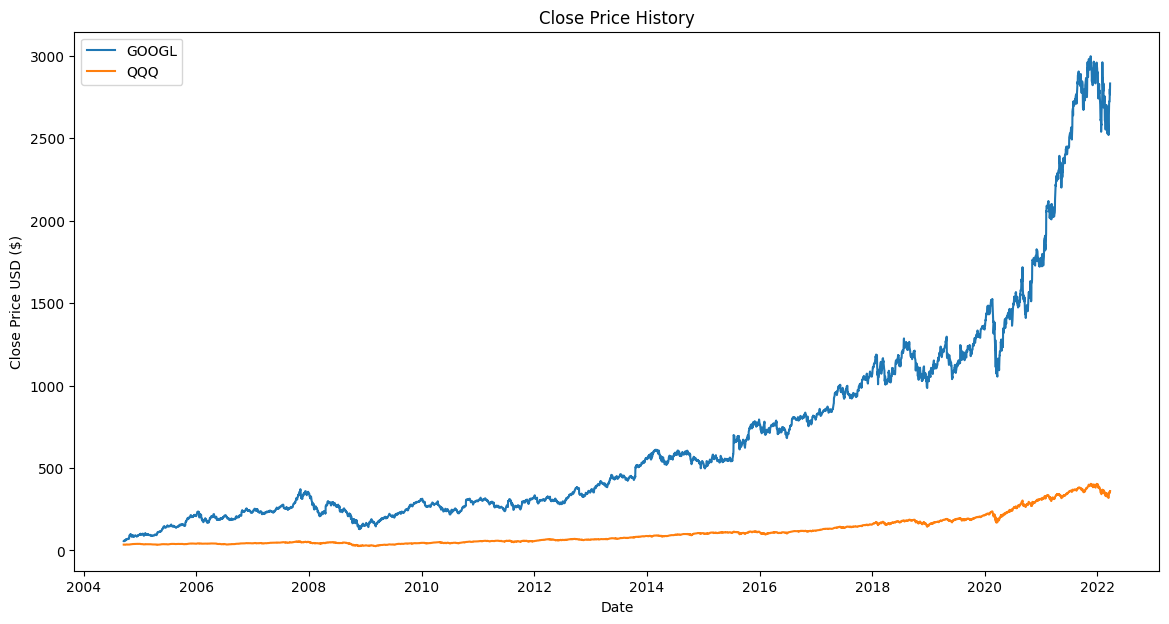

In [6]:
# Plot the close price
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.plot(googl_df['close'], label='GOOGL')
plt.plot(qqq_df['close'], label='QQQ')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

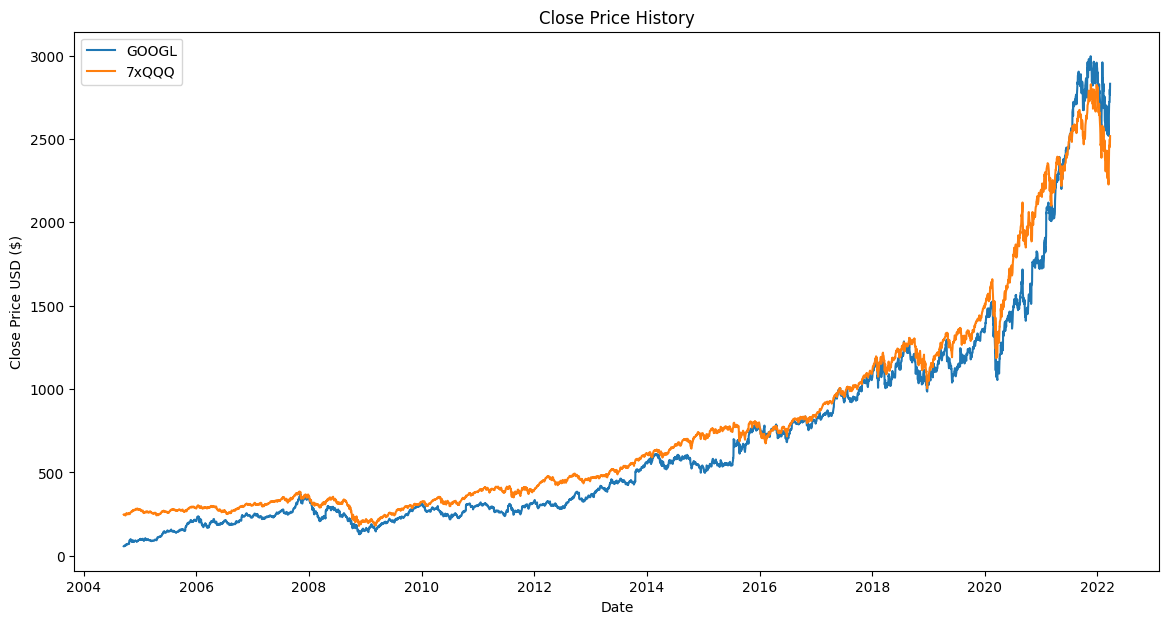

In [7]:
# Scaling QQQ times 7
# Plot the close price
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.plot(googl_df['close'], label='GOOGL')
plt.plot(7 * qqq_df['close'], label='7xQQQ')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

After scaling the QQQ close price times 7 to improve the quality of the visualization comparing the data, it is clear to see that GOOGL and QQQ follow and very similar curve.

Here below, we have the an exponential line of best fit to show the data

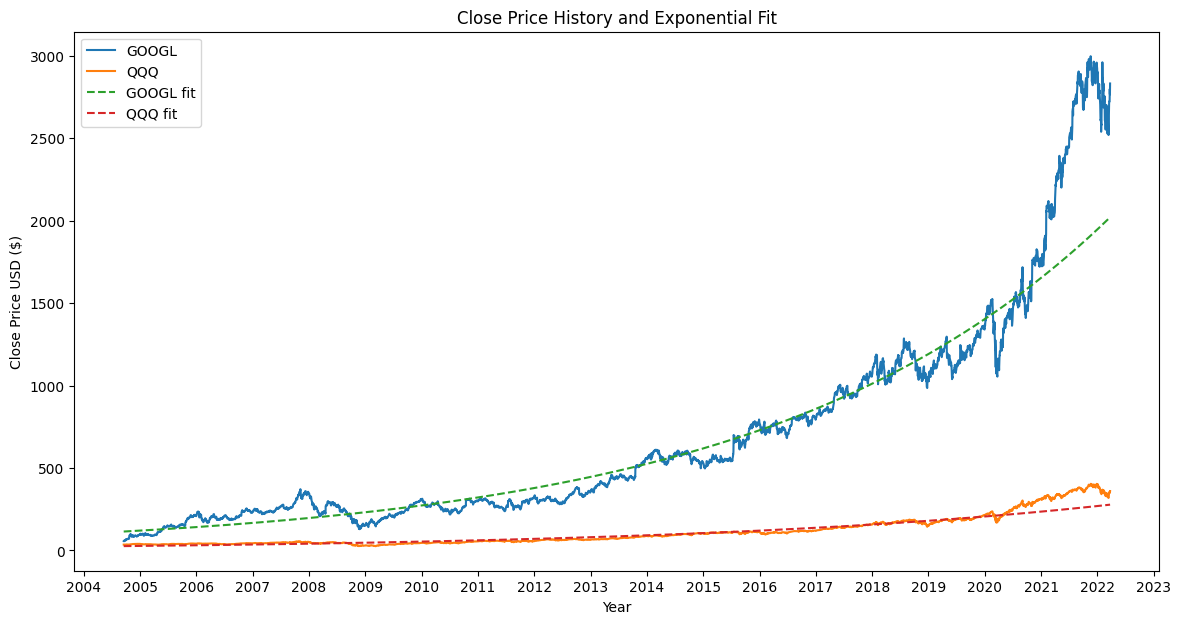

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert the index to a numerical format for curve fitting
x_data_googl = mdates.date2num(googl_df.index.to_pydatetime())
x_data_qqq = mdates.date2num(qqq_df.index.to_pydatetime())

# Fit an exponential curve to the close price data
coeffs_googl = np.polyfit(x_data_googl, np.log(googl_df['close']), 1)
coeffs_qqq = np.polyfit(x_data_qqq, np.log(qqq_df['close']), 1)

# Generate y values for the fitted curves
y_fit_googl = np.exp(np.polyval(coeffs_googl, x_data_googl))
y_fit_qqq = np.exp(np.polyval(coeffs_qqq, x_data_qqq))

# Plot the close price data and the fitted curves
plt.figure(figsize=(14,7))
plt.plot(x_data_googl, googl_df['close'], label='GOOGL', linestyle='-')
plt.plot(x_data_qqq, qqq_df['close'], label='QQQ', linestyle='-')
plt.plot(x_data_googl, y_fit_googl, label='GOOGL fit', linestyle='--')
plt.plot(x_data_qqq, y_fit_qqq, label='QQQ fit', linestyle='--')
plt.title('Close Price History and Exponential Fit')
plt.xlabel('Year')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.show()


As we can see using the line of best fit, it shows us the general trend over time, we see that both stocks increase exponentially and are directly correlated with each other. This makes sense, as the QQQ includes the stock of Google and the stocks may be influenced by the same factors, which results in the same movement in the stock market. The main difference is the scales at which the two stocks are listed at.

**Individual Stock Ticker Analysis: GOOGLE**

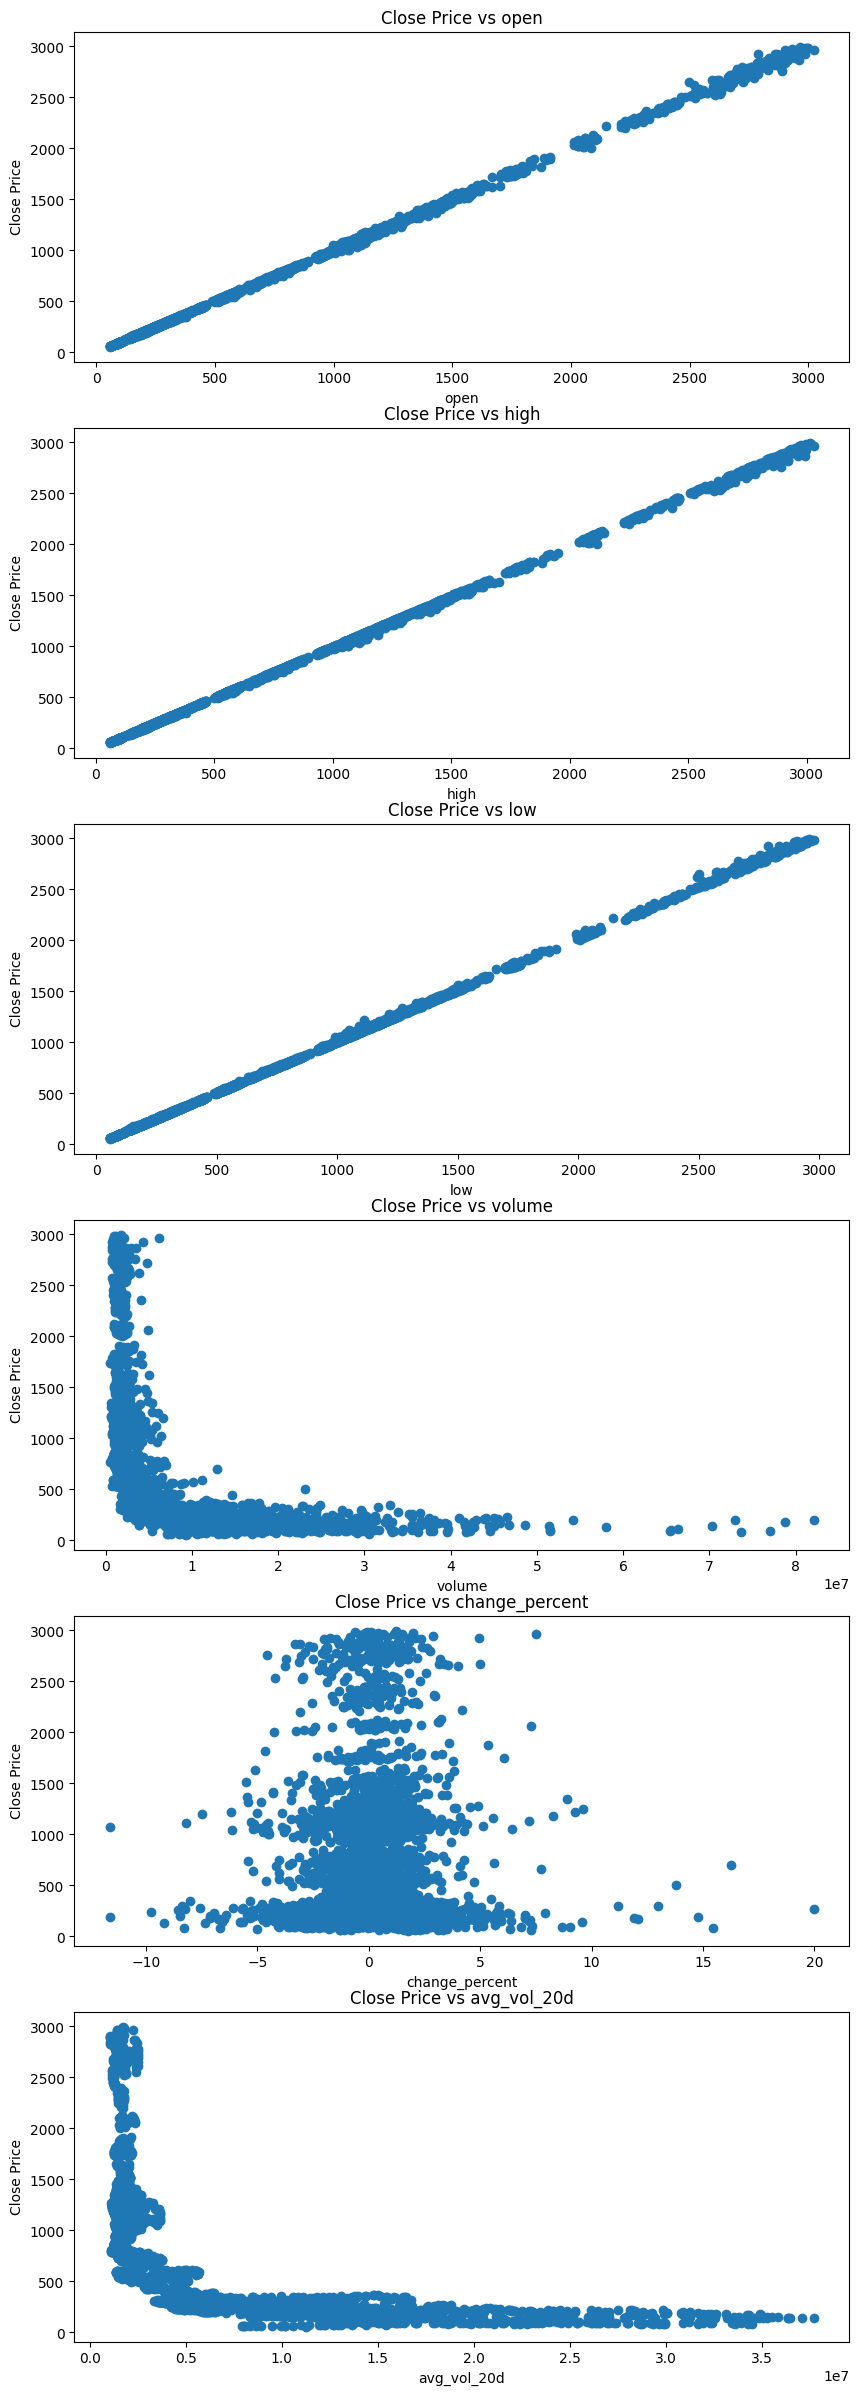

In [9]:
import matplotlib.pyplot as plt

# Get the list of columns except 'close'
columns = [col for col in googl_df.columns if col != 'close' and col!='date']

# Create a figure to hold the subplots
fig, axs = plt.subplots(len(columns), 1, figsize=(10, 5*len(columns)))

# For each column, create a scatter plot with 'close'
for i, col in enumerate(columns):
    axs[i].scatter(googl_df[col], googl_df['close'])
    axs[i].set_title(f'Close Price vs {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Close Price')
# Display the plot
plt.show()


This is the relationship between the closing price with all of our other attributes. Open, high, and close are not of interest since they are just linear plots thus they have a direct relation. Some interests goes into our volume with closing prices, as we see there is a negative correlation, as the price decreases, the volume traded increases. The change percent graph shows a strong distribution near 0, but skewed a bit to the right, thus we can conclude that the Google stock is somewhat stable that is giving positive percent change.

Statistical tests:

In [10]:
# For each column, run a t-test with 'close'
for col in columns:
    print("For", col, ":")
    print("     Correlation value:", googl_df["close"].corr(googl_df[col]))
    t_stat, p_val = scipy.stats.ttest_ind( googl_df['close'], googl_df[col])
    print("     T-Test:", t_stat, ", P_Value:", p_val)

For open :
     Correlation value: 0.999807257475826
     T-Test: 0.00065269481556192 , P_Value: 0.99947923967837
For high :
     Correlation value: 0.9999023107199174
     T-Test: -0.4827128212519919 , P_Value: 0.629311635807332
For low :
     Correlation value: 0.9999137949760197
     T-Test: 0.515427753224674 , P_Value: 0.6062670581841203
For volume :
     Correlation value: -0.45429662048881775
     T-Test: -55.58112002453979 , P_Value: 0.0
For change_percent :
     Correlation value: 0.007710700778716442
     T-Test: 71.62643098779829 , P_Value: 0.0
For avg_vol_20d :
     Correlation value: -0.5306481291805042
     T-Test: -64.96005395356738 , P_Value: 0.0


**Individual Stock Ticker Analysis: Nasdaq**

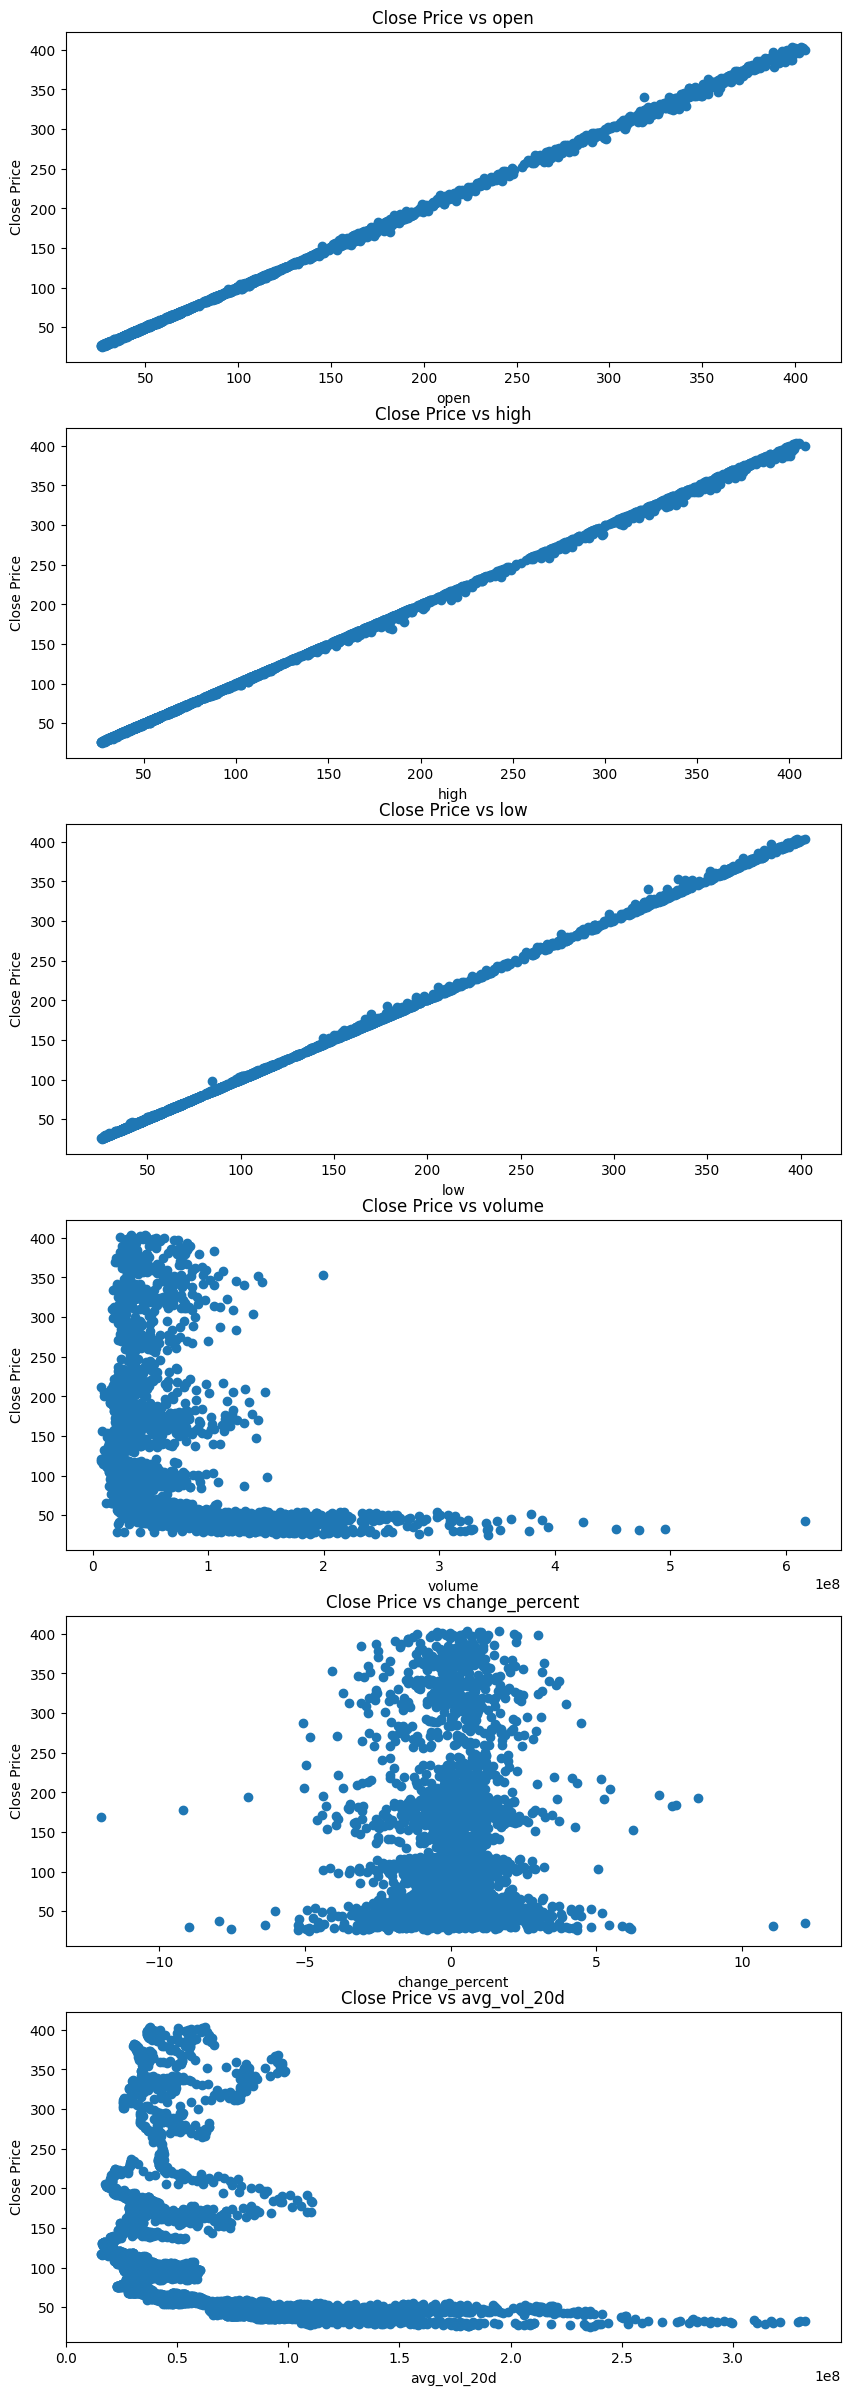

In [11]:
import matplotlib.pyplot as plt

# Get the list of columns except 'close'
columns = [col for col in qqq_df.columns if col != 'close' and col != 'date']

# Create a figure to hold the subplots
fig, axs = plt.subplots(len(columns), 1, figsize=(10, 5*len(columns)))

# For each column, create a scatter plot with 'close'
for i, col in enumerate(columns):
    axs[i].scatter(qqq_df[col], qqq_df['close'])
    axs[i].set_title(f'Close Price vs {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Close Price')
# Display the plot
plt.show()


Similarly with the Google's stock ticker analysis, the high, open, and close has no interest for us. Same analysis from the Google's percent change can be made here as well. The plot of interest is the volume with the closing price where there is more spread out than the Google's version.

Statistical tests:

In [12]:
# For each column, run a t-test with 'close'
for col in columns:
    print("For", col, ":")
    print("     Correlation value:", qqq_df["close"].corr(qqq_df[col]))
    t_stat, p_val = scipy.stats.ttest_ind( qqq_df['close'], qqq_df[col])
    print("     T-Test:", t_stat, ", P_Value:", p_val)

For open :
     Correlation value: 0.9998475486574046
     T-Test: 0.010624678964280791 , P_Value: 0.9915231324202753
For high :
     Correlation value: 0.9999091940587905
     T-Test: -0.3944720409433158 , P_Value: 0.693242100820405
For low :
     Correlation value: 0.9999209314953091
     T-Test: 0.46432501509010293 , P_Value: 0.6424263621909003
For volume :
     Correlation value: -0.39141416481040864
     T-Test: -83.42601905009595 , P_Value: 0.0
For change_percent :
     Correlation value: 0.02070483611795624
     T-Test: 82.49872793189601 , P_Value: 0.0
For avg_vol_20d :
     Correlation value: -0.450087032656195
     T-Test: -94.64790963639969 , P_Value: 0.0


Summarization of Data Analysis
<br> From both the GOOGL and QQQ t-tests, it is interesting to see for the high and low of each day that, although statistically significant, they are less influential in the closing price compared to the open. Both had high and low p-values in the .60s range. Additionally, it is interesting to see the similar correlation around -.5 for both stocks and their volume data. Volume can prove important in predicting closing price and/or percent change.
<br> Overall conclusions:
We have outlined a few interesting data that correlate (or don't) with the closing price of the GOOGL stock. Future work includes filtering down to the valuable correlations that can help us predict the future of the stock. Additionally, it will be important to use the percent change when comparing GOOGL and QQQ because their price values are on very different scales. The plan is to use this data to see if changes in QQQ lead to changes in GOOGL or vice versa.

<h3>4) Primary Analysis </h3>

For this section, we set up a small neuronetwork. First, we split the data with 80% training and 20% testing. Notice that we split the the training directly with no randomization, thus we are training on historical data and testing on modern data. Then we set up a neuronetwork with the input layers having the same amount of nodes as our features, and our 1 small hidden layer which is the input $^2$. Then we run the model and predict on it, we also printed out the mean squared value as well.
</br> The model we used is from TensorFlow Keras, to learn more, one can read more here: https://www.tensorflow.org/guide/keras


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn import metrics

googl_df = pd.read_csv("./data/cleaned_data/GOOGL_cleaned.csv")
qqq_df = pd.read_csv("./data/cleaned_data/QQQ_cleaned.csv")

# Add a percent change column to out dataframe
googl_df["per_change_diff"] = abs(googl_df["change_percent"] - qqq_df["change_percent"])

# Convert the 'date' column to datetime
googl_df['date'] = pd.to_datetime(googl_df['date'])

googl_df['date_seconds'] = (googl_df['date'] - pd.Timestamp("2004-09-16")) // pd.Timedelta('1s')
display(googl_df)

# Parse features
features = ["open", "high", "low", "volume", "avg_vol_20d","per_change_diff","date_seconds"]
X = pd.DataFrame((googl_df[features]), columns=features)
Y = (pd.DataFrame((googl_df[["close"]]), columns=["close"]))

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Calculate the split point
split_point = int(len(X) * 0.8)

# Split the data
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = Y[:split_point], Y[split_point:]

# Define the model
model = Sequential()
model.add(Dense(len(features), input_dim=len(features), activation='relu'))  # Input layer
model.add(Dense(len(features)**2, activation='relu'))  # Hidden layer
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model
model.fit(X_train, y_train, epochs=200, batch_size=32)

# Make predictions
y_pred = model.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


,date,open,high,low,close,volume,change_percent,avg_vol_20d,per_change_diff,date_seconds
0,2004-09-16,56.2262,57.9580,55.8809,57.0420,9266324,1.7589,11263125.5,1.5689,0
1,2004-09-17,57.2673,58.8038,56.8318,58.8038,9472518,3.0885,9503796.6,2.7785,86400
2,2004-09-20,58.5335,60.8609,58.4434,59.7397,10628761,1.5916,8893517.5,1.5816,345600
3,2004-09-21,59.9650,60.2703,58.8138,58.9790,7228764,-1.2735,8342149.4,1.6635,432000
4,2004-09-22,58.7588,59.8949,58.4635,59.2492,7581211,0.4583,7958843.1,2.1983,518400
...,...,...,...,...,...,...,...,...,...,...
4407,2022-03-18,2668.4900,2724.8799,2645.1699,2722.5100,2223100,1.7084,1793130.0,0.3416,552268800
4408,2022-03-21,2723.2700,2741.0000,2681.8501,2722.0300,1341600,-0.0176,1746160.0,0.2624,552528000
4409,2022-03-22,2722.0300,2821.0000,2722.0300,2797.3601,1774800,2.7674,1722425.0,0.7974,552614400
4410,2022-03-23,2774.0500,2791.7700,2756.7000,2765.5100,1257700,-1.1386,1703345.0,0.3014,552700800


Epoch 1/200


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 261727.7344
Epoch 2/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 269100.1562
Epoch 3/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 231600.4531
Epoch 4/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 160605.7500
Epoch 5/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 85110.9062
Epoch 6/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29989.4805
Epoch 7/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13579.3008
Epoch 8/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8483.9980
Epoch 9/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7382.7007
Epoch 10/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6951.4785
Epoch 11/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5662.0303
Epoch 12/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5521.4082
Epoch 13/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5376.4634
Epoch 14/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5102.2812
Ep

The mean squared error doesn't seem too bad, the average squared difference between the predicted and the actual stock price is about 39.16 which $\sqrt{39.16}\approx 6.26$ which is about 6.26$ off our predicted price. This is kind of high for our liking since this is for each stock, if we are trading in very high quantities it would either gain or cost millions.

Training on Nasdaq data then testing on Nasdaq data

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn import metrics

# Get data frame
qqq_df = pd.read_csv("./data/cleaned_data/QQQ_cleaned.csv")

features = ["open", "high", "low", "volume","change_percent", "avg_vol_20d"]
X = pd.DataFrame((qqq_df[features]), columns=features)
Y = (pd.DataFrame((qqq_df[["close"]]), columns=["close"]))

# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Define the model
model = Sequential()
model.add(Dense(6, input_dim=len(features), activation='relu'))  # Input layer
model.add(Dense(36, activation='relu'))  # Hidden layer
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[tensorflow.keras.metrics.MeanAbsoluteError()])

# Fit the model
model.fit(X_train, y_train, epochs=200, batch_size=32)

# Make predictions
y_pred = model.predict(X_test)


mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Epoch 1/200


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 19608.3105 - mean_absolute_error: 108.6803
Epoch 2/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17921.5488 - mean_absolute_error: 103.3651
Epoch 3/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9985.0381 - mean_absolute_error: 76.9972 
Epoch 4/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1946.2306 - mean_absolute_error: 34.9381
Epoch 5/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 450.8812 - mean_absolute_error: 16.2737
Epoch 6/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 319.5276 - mean_absolute_error: 12.9614
Epoch 7/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 284.1661 - mean_absolute_error: 11.5910
Epoch 8/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 261.8374 - mean_absolute_error: 10.9798
Epoch 9/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 236.9973 - mean_absolute_error: 10.5123
Epoch 10/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 210.6603 - mean_absolute_error: 

Notice this mean squared value is really low compared to our Google one, we might hypothesized this might have been caused due to price scaling of Google's VS Nasdq

Correlation between the 2 dataframes, dropping the date.

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

googl_df = pd.read_csv('./data/cleaned_data/GOOGL_cleaned.csv')
qqq_df = pd.read_csv('./data/cleaned_data/QQQ_cleaned.csv')

googl_df = googl_df.drop('date', axis=1)
qqq_df = qqq_df.drop('date', axis=1)

print(googl_df.corrwith(qqq_df))

open              0.989089
high              0.989274
low               0.989190
close             0.989238
volume            0.525279
change_percent    0.699515
avg_vol_20d       0.607149
dtype: float64


As we can see, there is a very high correlational between the two datasets, even without machine learning and AI, this shows a very high 

This mean squared error is very very high which is unexpected, we suspect there are other factors which could be at play which can dramatic role in the flucauations of Google's price ticker

<h3>5) Insights and Conclusions </h3>

After reading through the project, does an uninformed
reader feel informed about the topic? 
<br> Would a reader who already knew about the
topic feel like they learned more about it?